In [24]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [25]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

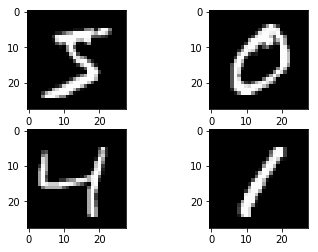

In [26]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_cnv = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_cnv = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print(num_pixels)

784


In [29]:
X_train_cnv = X_train_cnv / 255
X_test_cnv = X_test_cnv / 255

In [30]:
print(y_test)

[7 2 1 ..., 4 5 6]


In [31]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [32]:
print(y_test)

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [33]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:

from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='c:/log', histogram_freq=0,
                          write_graph=True, write_images=False)

# 모델 학습
model.fit(X_train_cnv,
    y_train,
    epochs=10,
    batch_size=200,
    verbose=2,
    callbacks=[tensorboard]
)

# 모델 정확도 분석 (scikit-learn의 score에 해당)
scores = model.evaluate(X_test_cnv, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
 - 9s - loss: 0.2768 - acc: 0.9205
Epoch 2/10
 - 9s - loss: 0.1106 - acc: 0.9682
Epoch 3/10
 - 9s - loss: 0.0715 - acc: 0.9793
Epoch 4/10
 - 9s - loss: 0.0503 - acc: 0.9857
Epoch 5/10
 - 9s - loss: 0.0358 - acc: 0.9900
Epoch 6/10
 - 9s - loss: 0.0268 - acc: 0.9929
Epoch 7/10
 - 9s - loss: 0.0205 - acc: 0.9948
Epoch 8/10
 - 9s - loss: 0.0143 - acc: 0.9968
Epoch 9/10
 - 9s - loss: 0.0110 - acc: 0.9976
Epoch 10/10
 - 9s - loss: 0.0082 - acc: 0.9986
Baseline Error: 1.82%


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [43]:
from PIL import Image, ImageFilter
import PIL.ImageOps 
from numpy import array

class ScaleUtils():
    def __init__(self, p, h=28, w=28):
        self.im = Image.open(p)
        self.size = (h,w)
    def toGrey(self):
        self.im = self.im.convert("L")
        return self
    def resize(self):
        self.im = self.im.resize(self.size)
        return self
    def invert(self):
        self.im = PIL.ImageOps.invert(self.im)
        return self
    def getArray(self):
        return array(self.im)
    def getImage(self):
        return self.im
    def run(self):
        return self.toGrey().resize().getArray()
    
# this particular one requires invert
ScaleUtils("c:/test_8_digit.png").toGrey().resize().invert().getImage().save("output.jpg", "JPEG")

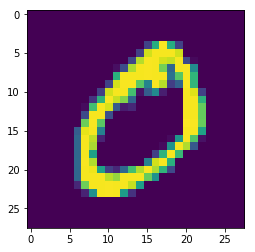

1/1 [==============================] - 0s 26ms/step
[0]


In [38]:
plt.imshow(X_train[1])
plt.show()

input = X_train_cnv[1]
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

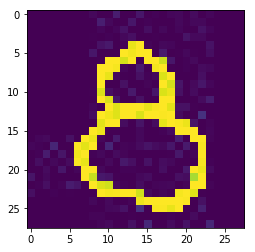

1/1 [==============================] - 0s 2ms/step
[8]


In [44]:
# 테스트 이미지가 output.jpg인 경우
from scipy.misc import imread
import matplotlib.pyplot as plt

im = imread("output.jpg")
plt.imshow(im)
plt.show()

input = im
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)